In [1]:
gse_id='GSE56046'
url='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56046/suppl/GSE56046_methylome_normalized.txt.gz'
!wget {url} -O matrix.gz

--2020-06-10 14:46:58--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56046/suppl/GSE56046_methylome_normalized.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 2607:f220:41e:250::11
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767511671 (4.4G) [application/x-gzip]
Saving to: ‘matrix.gz’

matrix.gz           100%[===================>]   4.44G  59.6MB/s    in 3m 31s  

2020-06-10 14:50:29 (21.6 MB/s) - ‘matrix.gz’ saved [4767511671/4767511671]



In [2]:
import pandas as pd
df=pd.read_table('matrix.gz',index_col=0)
df.shape

(485577, 2404)

In [3]:
cols=[c for c in df.columns if 'Mvalue' in c]
df=df[cols].transpose()
df.index=[c.split('.')[0] for c in df.index]
df.index.name = "title"
df.head()

ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
title,,,,,,,,,,,,,,,,,,,,,
100001,-0.248280,3.516344,2.752625,-2.030849,1.069549,0.921473,1.770154,-1.568020,-0.798329,-4.902042,...,4.044142,-4.191196,-3.318176,4.153255,-0.009613,3.561170,4.167266,0.193568,0.396028,0.910162
100002,-0.020392,3.856286,3.267494,-1.462111,1.146412,1.284308,1.933714,-1.383314,-0.352035,-4.661193,...,3.560934,3.832218,-2.984095,3.947666,0.177119,3.419985,-3.437176,0.156350,-3.110338,3.526948
100003,-0.373721,4.239439,2.992055,-1.464236,1.340683,1.084973,2.048763,-1.333183,-0.544169,-4.832114,...,0.167512,-4.382972,3.262768,4.088618,0.142284,3.574489,3.647460,3.539714,3.376887,3.715418
100004,-0.237185,3.519516,2.926529,-1.569228,0.962154,1.297303,1.901422,1.422763,-0.109853,-4.899305,...,-0.034964,-4.120961,-0.168451,0.221137,-3.731578,0.242991,-3.858558,-3.557707,0.200919,0.703613
100005,0.284723,3.880296,2.868053,-1.719939,1.104444,1.144721,1.861088,-0.164641,-0.927407,-4.983465,...,-3.357696,-0.418772,-0.121651,0.204594,-0.010345,3.658783,0.279019,-3.048233,0.058746,3.175379


In [4]:
import GEOparse
gse = GEOparse.get_GEO(geo=gse_id, destdir="./")
age_field='characteristics_ch1.2.age'
ages=gse.phenotype_data[['title',age_field]]
ages.index=ages.title
ages=ages.drop('title',1)
ages.index=[age.split('_')[0] for age in ages.index]
ages.columns=['age']

10-Jun-2020 14:55:51 DEBUG utils - Directory ./ already exists. Skipping.
10-Jun-2020 14:55:51 INFO GEOparse - File already exist: using local version.
10-Jun-2020 14:55:51 INFO GEOparse - Parsing ./GSE56046_family.soft.gz: 
10-Jun-2020 14:55:51 DEBUG GEOparse - DATABASE: GeoMiame
10-Jun-2020 14:55:51 DEBUG GEOparse - SERIES: GSE56046
10-Jun-2020 14:55:51 DEBUG GEOparse - PLATFORM: GPL13534
/home/mahdi_moqri_gmail_com/miniconda3/envs/foxo/lib/python3.8/site-packages/GEOparse/GEOparse.py:104: DtypeWarning: Columns (11,14,15,36) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath)
10-Jun-2020 14:55:58 DEBUG GEOparse - SAMPLE: GSM1353204
10-Jun-2020 14:55:59 DEBUG GEOparse - SAMPLE: GSM1353205
10-Jun-2020 14:55:59 DEBUG GEOparse - SAMPLE: GSM1353206
10-Jun-2020 14:55:59 DEBUG GEOparse - SAMPLE: GSM1353207
10-Jun-2020 14:55:59 DEBUG GEOparse - SAMPLE: GSM1353208
10-Jun-2020 14:55:59 DEBUG GEOparse - SAMPLE: GSM1353209
10-Jun-2020 14:55:59 DE

In [5]:
df=df.merge(ages,left_index=True, right_index=True)
df.head()

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873,age
title,,,,,,,,,,,,,,,,,,,,,
100001,-0.248280,3.516344,2.752625,-2.030849,1.069549,0.921473,1.770154,-1.568020,-0.798329,-4.902042,...,-4.191196,-3.318176,4.153255,-0.009613,3.561170,4.167266,0.193568,0.396028,0.910162,59
100002,-0.020392,3.856286,3.267494,-1.462111,1.146412,1.284308,1.933714,-1.383314,-0.352035,-4.661193,...,3.832218,-2.984095,3.947666,0.177119,3.419985,-3.437176,0.156350,-3.110338,3.526948,63
100003,-0.373721,4.239439,2.992055,-1.464236,1.340683,1.084973,2.048763,-1.333183,-0.544169,-4.832114,...,-4.382972,3.262768,4.088618,0.142284,3.574489,3.647460,3.539714,3.376887,3.715418,71
100004,-0.237185,3.519516,2.926529,-1.569228,0.962154,1.297303,1.901422,1.422763,-0.109853,-4.899305,...,-4.120961,-0.168451,0.221137,-3.731578,0.242991,-3.858558,-3.557707,0.200919,0.703613,72
100005,0.284723,3.880296,2.868053,-1.719939,1.104444,1.144721,1.861088,-0.164641,-0.927407,-4.983465,...,-0.418772,-0.121651,0.204594,-0.010345,3.658783,0.279019,-3.048233,0.058746,3.175379,48


In [6]:
import numpy as np
df.age=df.age.replace('-',np.nan)
df=df.dropna(subset=['age'])
df.age=df.age.astype(int)
df.shape

(1202, 485578)

In [7]:
cor=df.corrwith(df.age)
cor.sort_values()

cg10501210   -0.550466
cg07082267   -0.522169
cg19283806   -0.518262
cg16932827   -0.506581
cg19758448   -0.487685
                ...   
cg24724428    0.559651
cg07544187    0.572322
cg04875128    0.646703
cg16867657    0.647770
age           1.000000
Length: 485578, dtype: float64

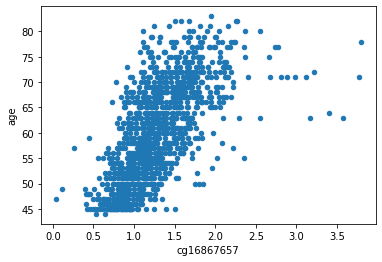

In [11]:
df[['cg16867657','age']].plot.scatter('cg16867657','age')

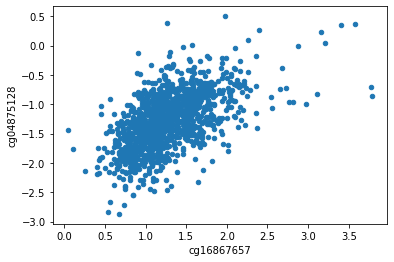

In [9]:
df[['cg16867657','cg04875128']].plot.scatter('cg16867657','cg04875128')

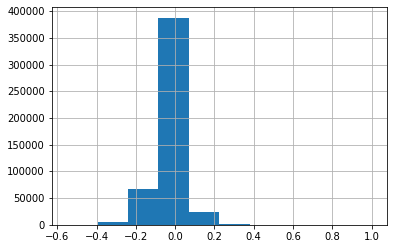

In [10]:
import matplotlib as plt
cor.hist()